# Error interference in the second-order Product formula
The second-order Product Formula reads

$$
U_{pf2} = \prod_{l=1}^L e^{-i H_l t/(2r)}  \prod_{l=L}^1 e^{-i H_l t/(2r)} 
$$

In [2]:
import numpy as np
from scipy.linalg import expm

from trotter import *
from plot_config import *
from lattice_hamiltonians import norm, interference_bound, tight_bound
# from quantum_simulation_recipe import spin
from quantum_simulation_recipe.spin import Nearest_Neighbour_1d, Power_Law

mpl.rcParams['legend.frameon'] = True
mpl.rcParams['lines.markersize'] = 12
mpl.rcParams['xtick.direction'] = 'out' # 'out'
mpl.rcParams['ytick.direction'] = 'out'

fig_dir, data_dir = './figs', './data'

from colorspace import qualitative_hcl, swatchplot
# pal = qualitative_hcl()
pal = qualitative_hcl("Dark 2")  # Dynamic
cc = [c+'FF' for c in pal(5)]  # Draw list of 4 colors across the palette
# print('color_cycle: ', cc)
# swatchplot([pal], figsize = (5, 0.5))
# ['#C87A8AFF', '#A29048FF', '#45A271FF', '#2A9EB5FF', '#A782C3FF']
set_color_cycle(color_cycle)

In [5]:
prefix, suffix = "PF2_intefer", "TFI"
n = 8
J, h = 2.0, 0.01 
t = 20
r_list = np.logspace(1.4, 2.5, 20, dtype=int)
print("r_list: ", r_list)
err_list_pf1_xyz, err_list_pf2_xyz = [], []
err_list_pf1_par, err_list_pf2_par = [], []

tfI = Nearest_Neighbour_1d(n=n, Jx=0, Jy=0, Jz=J, hx=h, hy=0, hz=0, pbc=True)
#  = TF_Ising_1d(n=n, J=J, h=h, pbc=False)
print(tfI.ham)
print("xyz: ", tfI.ham_xyz)
print("parity: ", tfI.ham_par)
assert sum([h.to_matrix() for h in tfI.ham_xyz]).all() == sum([h.to_matrix() for h in tfI.ham_par]).all()

for r in r_list:
    exact_U = expm(-1j * t * tfI.ham.to_matrix())
    appro_U_xyz_pf1 = pf_r([h.to_matrix(True) for h in tfI.ham_xyz], t, r, order=1, use_jax=False)
    appro_U_xyz_pf2 = pf_r([h.to_matrix(True) for h in tfI.ham_xyz], t, r, order=2, use_jax=False)
    appro_U_par_pf1 = pf_r([h.to_matrix(True) for h in tfI.ham_par], t, r, order=1, use_jax=False)
    appro_U_par_pf2 = pf_r([h.to_matrix(True) for h in tfI.ham_par], t, r, order=2, use_jax=False)
    err_list_pf1_xyz.append(norm(exact_U - appro_U_xyz_pf1))
    err_list_pf2_xyz.append(norm(exact_U - appro_U_xyz_pf2))
    err_list_pf1_par.append(norm(exact_U - appro_U_par_pf1))
    err_list_pf2_par.append(norm(exact_U - appro_U_par_pf2))

xyz_group = [h.to_matrix() for h in tfI.ham_xyz]
par_group = [h.to_matrix() for h in tfI.ham_par]
# print(par_group)

interf_bound_par = np.array([interference_bound(par_group, t, r) for r in r_list])
# print('interf_bound_par:', interf_bound_par)
interf_bound_xyz = np.array([interference_bound(xyz_group, t, r) for r in r_list])

e_pf1_tight_xyz = np.array([tight_bound(xyz_group, 1, t, r) for r in r_list])
e_pf1_tight_par = np.array([tight_bound(par_group, 1, t, r) for r in r_list])
e_pf2_tight_xyz = np.array([tight_bound(xyz_group, 2, t, r) for r in r_list])
e_pf2_tight_par = np.array([tight_bound(par_group, 2, t, r) for r in r_list])

r_list:  [ 25  28  32  37  42  48  55  63  72  83  95 108 124 142 162 185 211 242
 276 316]
SparsePauliOp(['IIIIIIZZ', 'IIIIIZZI', 'IIIIZZII', 'IIIZZIII', 'IIZZIIII', 'IZZIIIII', 'ZZIIIIII', 'ZIIIIIIZ', 'IIIIIIIX', 'IIIIIIXI', 'IIIIIXII', 'IIIIXIII', 'IIIXIIII', 'IIXIIIII', 'IXIIIIII', 'XIIIIIII'],
              coeffs=[2.  +0.j, 2.  +0.j, 2.  +0.j, 2.  +0.j, 2.  +0.j, 2.  +0.j, 2.  +0.j,
 2.  +0.j, 0.01+0.j, 0.01+0.j, 0.01+0.j, 0.01+0.j, 0.01+0.j, 0.01+0.j,
 0.01+0.j, 0.01+0.j])
xyz:  [SparsePauliOp(['IIIIIIIX', 'IIIIIIXI', 'IIIIIXII', 'IIIIXIII', 'IIIXIIII', 'IIXIIIII', 'IXIIIIII', 'XIIIIIII'],
              coeffs=[0.01+0.j, 0.01+0.j, 0.01+0.j, 0.01+0.j, 0.01+0.j, 0.01+0.j, 0.01+0.j,
 0.01+0.j]), SparsePauliOp(['IIIIIIZZ', 'IIIIIZZI', 'IIIIZZII', 'IIIZZIII', 'IIZZIIII', 'IZZIIIII', 'ZZIIIIII', 'ZIIIIIIZ'],
              coeffs=[2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j])]
parity:  [SparsePauliOp(['IIIIIIZZ', 'IIIIZZII', 'IIZZIIII', 'ZZIIIIII', 'IIIIIIIX', 'IIIII

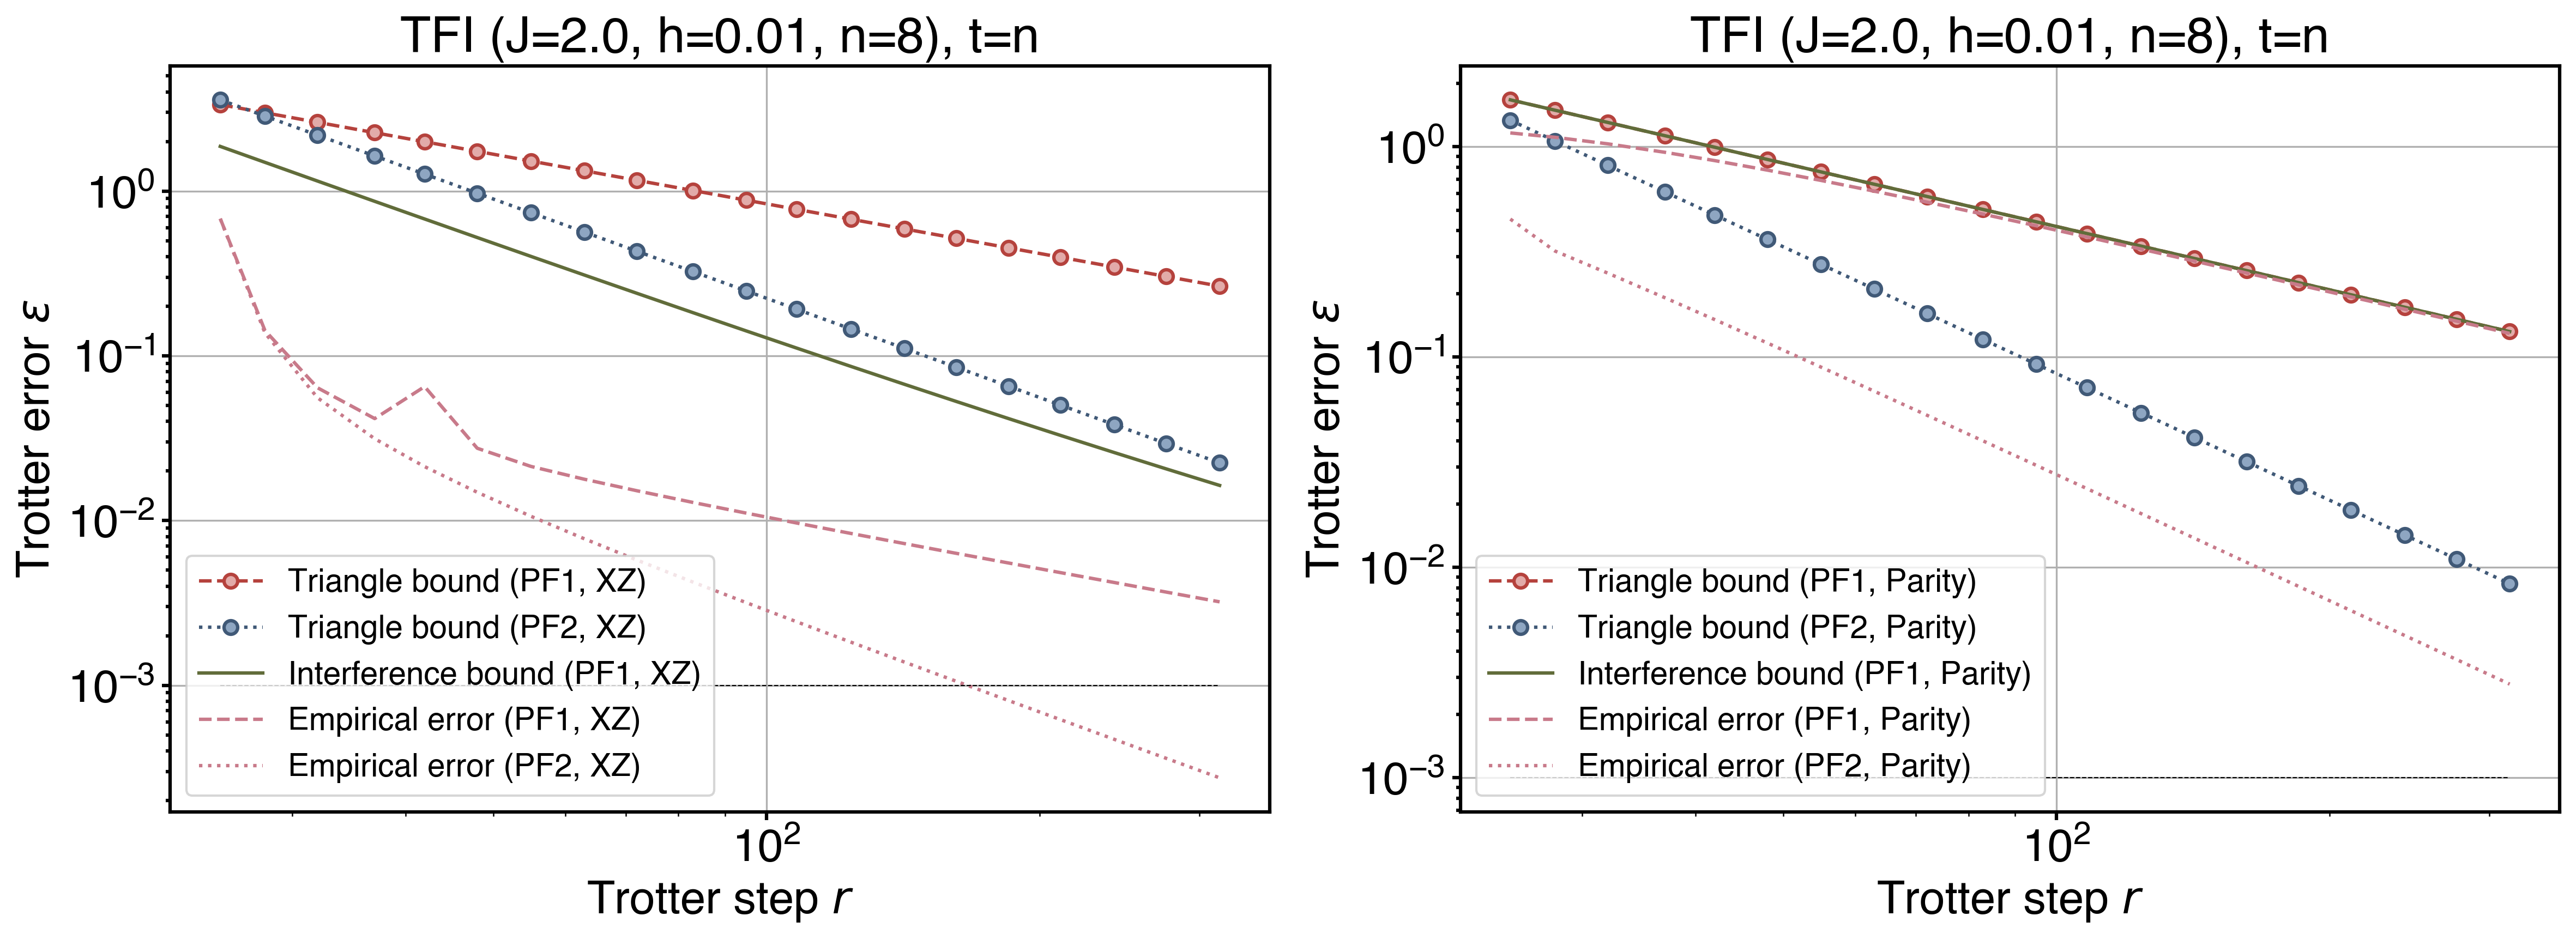

In [6]:
## visualization
plt.rc('legend', fontsize=MEDIUM_SIZE-4) 
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[1].plot(r_list, e_pf1_tight_par, '.--', label='Triangle bound (PF1, Parity)')
axes[0].plot(r_list, e_pf1_tight_xyz, '.--', label='Triangle bound (PF1, XZ)')
axes[1].plot(r_list, e_pf2_tight_par, '.:', label='Triangle bound (PF2, Parity)')
axes[0].plot(r_list, e_pf2_tight_xyz, '.:', label='Triangle bound (PF2, XZ)')

axes[1].plot(r_list, interf_bound_par[:, 0], '-', label='Interference bound (PF1, Parity)')
axes[0].plot(r_list, interf_bound_xyz[:, 0], '-', label='Interference bound (PF1, XZ)')

axes[0].plot(r_list, err_list_pf1_xyz, '--', label='Empirical error (PF1, XZ)', c=cc[0])
axes[0].plot(r_list, err_list_pf2_xyz, ':', label='Empirical error (PF2, XZ)', c=cc[0])
axes[1].plot(r_list, err_list_pf1_par, '--', label='Empirical error (PF1, Parity)', c=cc[0])
axes[1].plot(r_list, err_list_pf2_par, ':', label='Empirical error (PF2, Parity)', c=cc[0])

for ax in axes:
    ax.hlines(1e-3, r_list[0], r_list[-1], 'k', '--', linewidth=0.5)
    ax_set_text(ax, r'Trotter step $r$', r'Trotter error $\epsilon$', log='xy')
    ax.set_title(f'TFI (J={J}, h={h}, n={n}), t=n')
    # ax.legend(loc='center left', bbox_to_anchor=(1.01, 0.5))

fig.savefig(f'{fig_dir}/{prefix}_n={n}_t={t}_J={J}_h={h}_{suffix}.pdf', bbox_inches='tight')

---------Heisenberg Hamiltonian---------
inter_xx: ['XXIIIII', 'IXXIIII', 'IIXXIII', 'IIIXXII', 'IIIIXXI', 'IIIIIXX', 'XIIIIIX']
inter_yy: ['YYIIIII', 'IYYIIII', 'IIYYIII', 'IIIYYII', 'IIIIYYI', 'IIIIIYY', 'YIIIIIY']
inter_zz: ['ZZIIIII', 'IZZIIII', 'IIZZIII', 'IIIZZII', 'IIIIZZI', 'IIIIIZZ', 'ZIIIIIZ']
external ['ZIIIIII', 'IZIIIII', 'IIZIIII', 'IIIZIII', 'IIIIZII', 'IIIIIZI', 'IIIIIIZ']
---------Partitioned Hamiltonian---------
inter_xx_even: ['XXIIIII', 'IIXXIII', 'IIIIXXI', 'XIIIIIX']
inter_xx_odd: ['IXXIIII', 'IIIXXII', 'IIIIIXX']
external_even ['ZIIIIII', 'IIZIIII', 'IIIIZII', 'IIIIIIZ']
external_odd ['IZIIIII', 'IIIZIII', 'IIIIIZI']


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:302: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


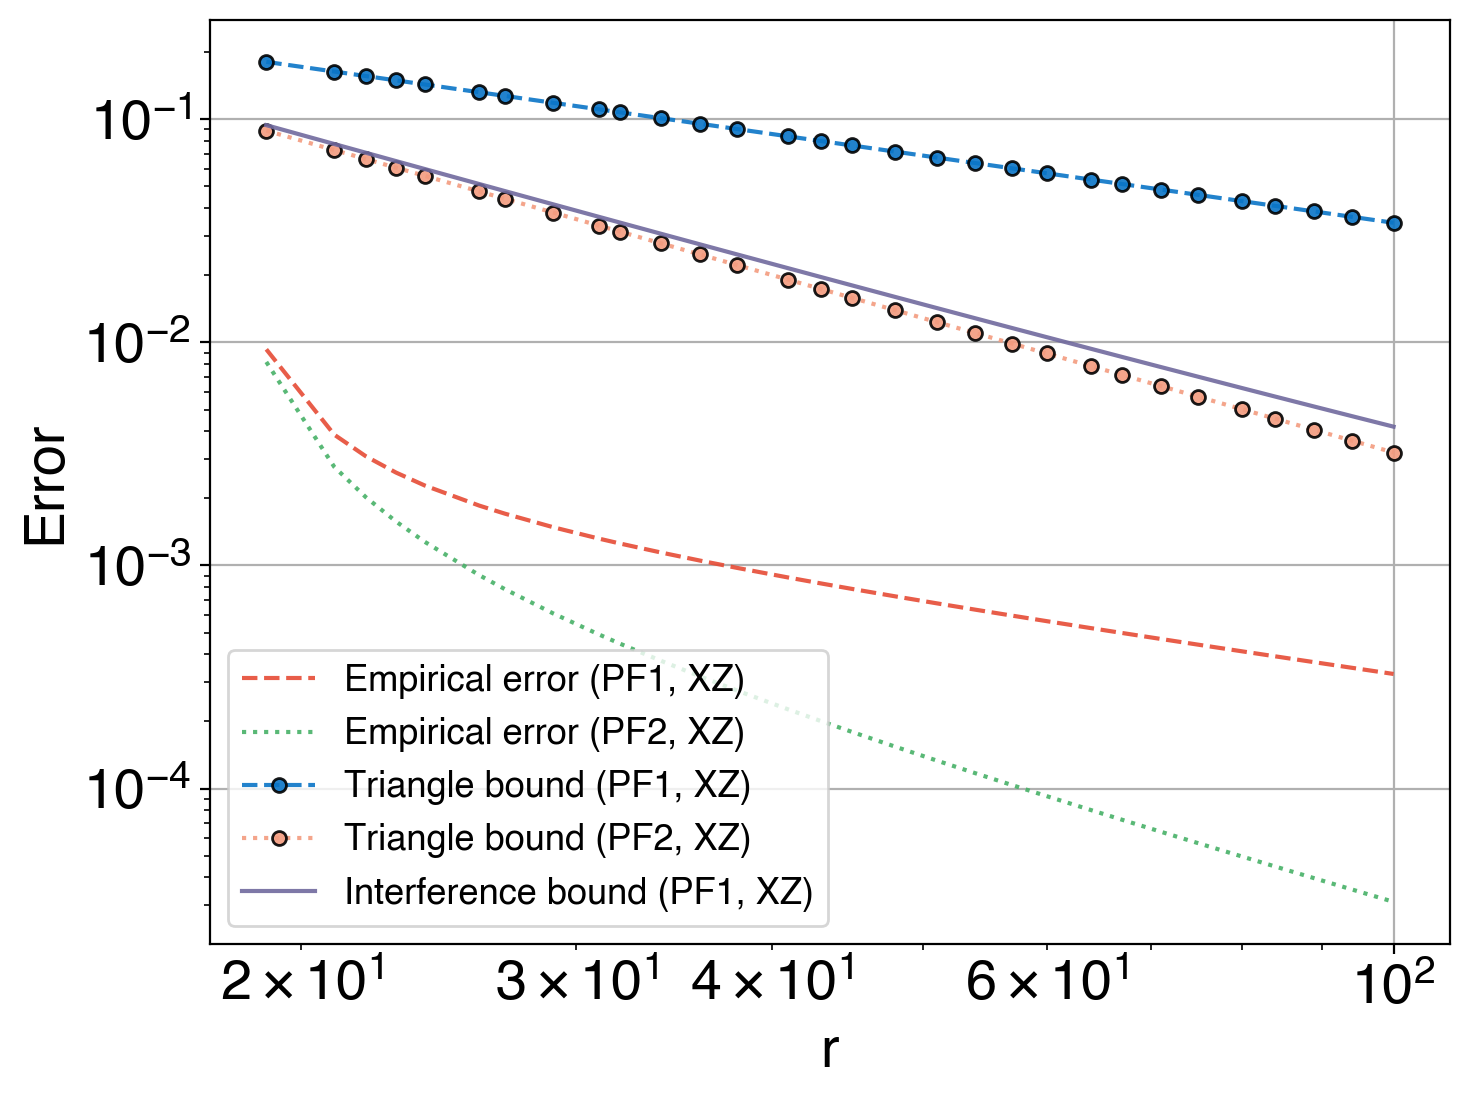

In [24]:
from scipy.sparse import csr_matrix

err_norm = 'spectral' # HS, spectral
n = 7; epsilon = 0.001
t = 2 * n
J_x, J_y, J_z, h = 2.0, 0.0, 0.0, 0.001
# J_x, J_y, J_z, h = 2.0, 2.0, 2.0, 0.5
# J_x, J_y, J_z, h = 1.5, 1.5, 1.5, 1.1
heisenberg = heisenberg_1d(n=n, Jx=J_x, Jy=J_y, Jz=J_z, h=h, verbose=True)
# print(heisenberg.xx)
heisenberg.partition(method='parity', verbose=True)
heisenberg.partition(method='tri', verbose=True)
parity_group_sparse = [csr_matrix(heisenberg.even), csr_matrix(heisenberg.odd)]
parity_group = [heisenberg.even.to_matrix(), heisenberg.odd.to_matrix()]
# parity_label = ['even-odd', 'odd-even']; parity_markers = ['*:', '.--']

tri_group_sparse = [csr_matrix(heisenberg.term0), csr_matrix(heisenberg.term1), csr_matrix(heisenberg.term2)]
tri_group = [heisenberg.term0.to_matrix(), heisenberg.term1.to_matrix(), heisenberg.term2.to_matrix()]

# r_list = np.logspace(2, 6, num=30, dtype=int)
r_list = np.logspace(1.3, 2, num=30, dtype=int)
# r_list = np.logspace(1.0, 2, num=30, dtype=int)
# r_list = np.logspace(1.0, 2, num=30, dtype=int)
# r_list_truncated = np.logspace(2, 6, num=30, dtype=int)

interf_bound_par = np.array([interference_bound(parity_group, t, r) for r in r_list])

xyz_group_sparse = [csr_matrix(heisenberg.xx), csr_matrix(heisenberg.yy), csr_matrix(heisenberg.zz) + csr_matrix(heisenberg.z)]
xyz_group = [heisenberg.xx.to_matrix() , heisenberg.yy.to_matrix(), heisenberg.zz.to_matrix() + heisenberg.z.to_matrix()]
interf_bound_xyz = np.array([interference_bound([heisenberg.xx.to_matrix() , heisenberg.zz.to_matrix() + heisenberg.z.to_matrix()], t, r) for r in r_list])

e_pf1_tight_xyz = np.array([tight_bound(xyz_group, 1, t, r) for r in r_list])
e_pf2_tight_xyz = np.array([tight_bound(xyz_group, 2, t, r) for r in r_list])
e_pf1_tight_par = np.array([tight_bound(parity_group, 1, t, r) for r in r_list])
e_pf2_tight_par = np.array([tight_bound(parity_group, 2, t, r) for r in r_list])

exact_U = expm(-1j * t * sum(xyz_group))
# exact_U = expm(-1j * t * sum(parity_group))
pf1_parity_list = [op_error(unitary_matrix_product(parity_group_sparse, t=t/r)**r, exact_U, err_norm) for r in r_list]
pf2_parity_list = [op_error((unitary_matrix_product(parity_group_sparse, t=t/(2*r)) @ unitary_matrix_product(parity_group_sparse[::-1], t=t/(2*r)))**r, exact_U) for r in r_list]
pf1_xyz_list = [op_error(unitary_matrix_product(xyz_group_sparse, t=t/r)**r, exact_U, err_norm) for r in r_list]
pf2_xyz_list = [op_error((unitary_matrix_product(xyz_group_sparse, t=t/(2*r)) @ unitary_matrix_product(xyz_group_sparse[::-1], t=t/(2*r)))**r, exact_U) for r in r_list]

fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=100)
# ax.hlines(1e-3, r_list[0], r_list[-1], 'k', '--', linewidth=0.5)

# ax.plot(r_list, pf1_parity_list, '.-', label='Empirical error (PF1, Parity)')
# ax.plot(r_list, pf2_parity_list, '.--', label='Empirical error (PF2, Parity)')
# ax.plot(r_list, e_pf2_tight_par, '.:', label='Triangle bound (PF2, Parity)')
ax.plot(r_list, pf1_xyz_list, '--', label='Empirical error (PF1, XZ)')
ax.plot(r_list, pf2_xyz_list, ':', label='Empirical error (PF2, XZ)')
ax.plot(r_list, e_pf1_tight_xyz, '.--', label='Triangle bound (PF1, XZ)')
ax.plot(r_list, e_pf2_tight_xyz, '.:', label='Triangle bound (PF2, XZ)')
# ax.plot(r_list, err_list, '--', label='Empirical error (PF2)')
# ax.plot(r_list, interf_bound_par[:, 0], '-', label='Interference bound (PF1, Parity)')
ax.plot(r_list, interf_bound_xyz[:, 0], '-', label='Interference bound (PF1, XZ)')
# ax.plot(r_list, e_pf1_tight_par, '.-', label='Triangle bound (PF1, Parity)')
ax.set_xlabel('r')
ax.set_ylabel('Error')
# ax.set_title(fr'Heisenberg ($J_x={J_x}, J_y={J_y}, J_z={J_z}$, h={h}, n={n}), t=n')
ax.loglog()
# ax.set_ylim(1e-5, 5e0)
ax.grid()
ax.legend()
# ax.legend(loc='center left', bbox_to_anchor=(1.01, 0.5))
fig.savefig(f'./figs/ising_pf2_n={n}.pdf', bbox_inches='tight')

---------Heisenberg Hamiltonian---------
inter_xx: ['XXIIIII', 'IXXIIII', 'IIXXIII', 'IIIXXII', 'IIIIXXI', 'IIIIIXX', 'XIIIIIX']
inter_yy: ['YYIIIII', 'IYYIIII', 'IIYYIII', 'IIIYYII', 'IIIIYYI', 'IIIIIYY', 'YIIIIIY']
inter_zz: ['ZZIIIII', 'IZZIIII', 'IIZZIII', 'IIIZZII', 'IIIIZZI', 'IIIIIZZ', 'ZIIIIIZ']
external ['ZIIIIII', 'IZIIIII', 'IIZIIII', 'IIIZIII', 'IIIIZII', 'IIIIIZI', 'IIIIIIZ']
---------Partitioned Hamiltonian---------
inter_xx_even: ['XXIIIII', 'IIXXIII', 'IIIIXXI', 'XIIIIIX']
inter_xx_odd: ['IXXIIII', 'IIIXXII', 'IIIIIXX']
external_even ['ZIIIIII', 'IIZIIII', 'IIIIZII', 'IIIIIIZ']
external_odd ['IZIIIII', 'IIIZIII', 'IIIIIZI']


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:302: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


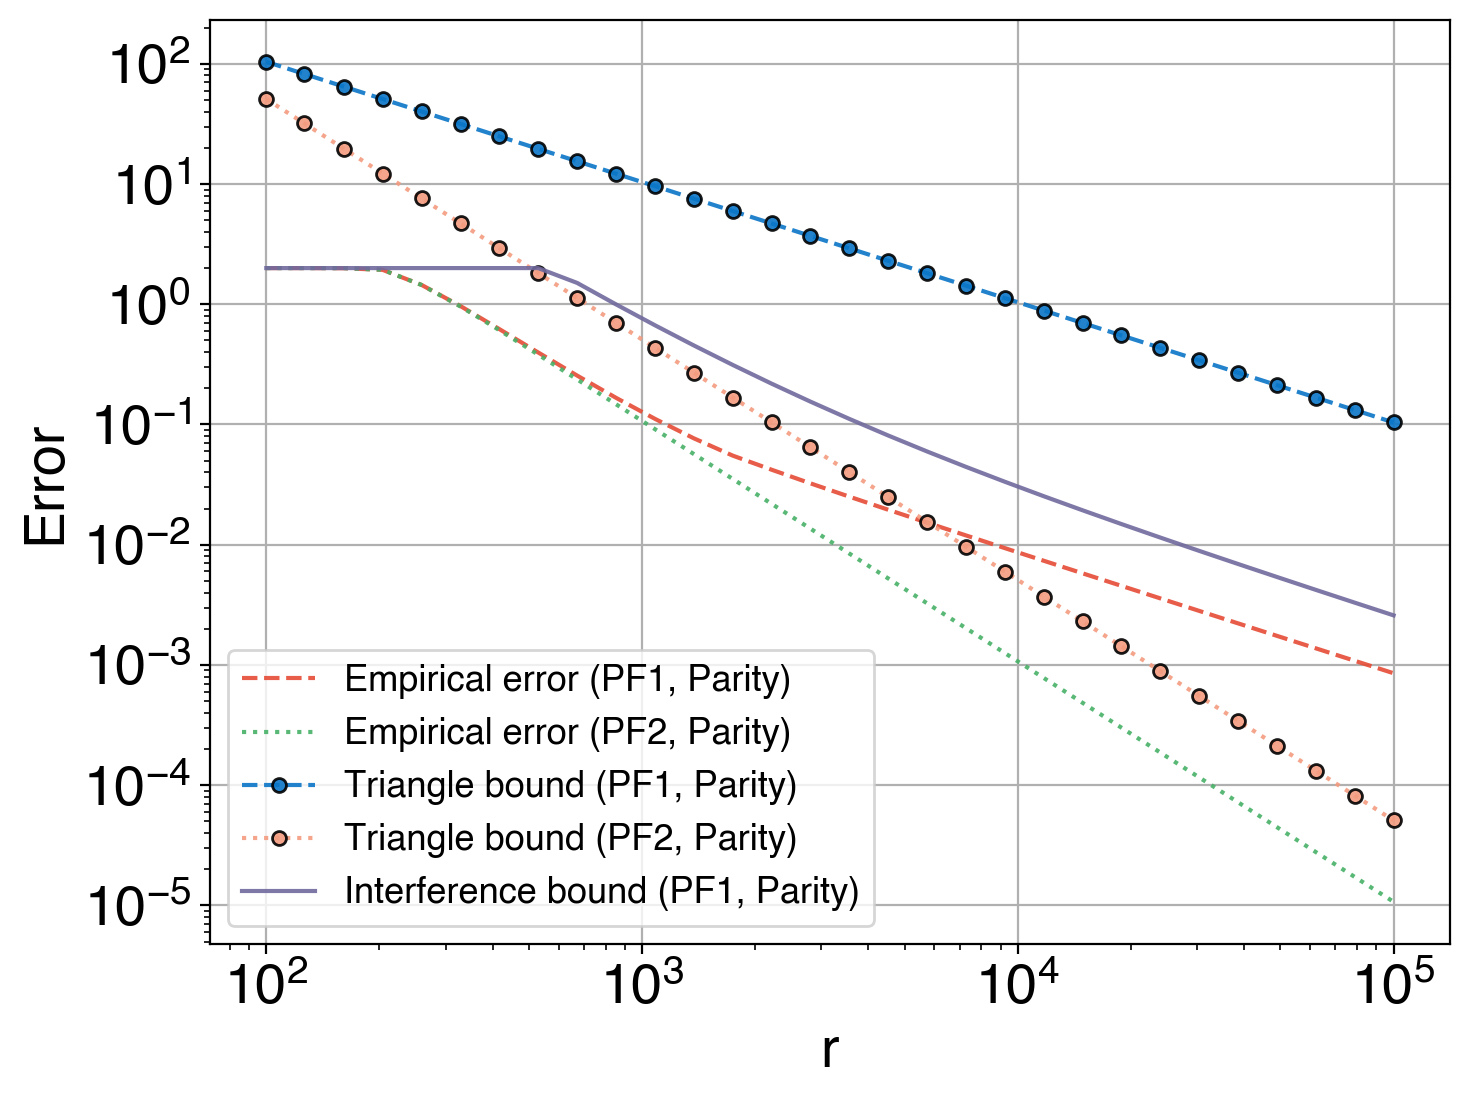

In [30]:
from scipy.sparse import csr_matrix

err_norm = 'spectral' # HS, spectral
n = 7; epsilon = 0.001
t = 2 * n
# J_x, J_y, J_z, h = 2.0, 0.0, 0.0, 0.001
J_x, J_y, J_z, h = 2.0, 2.0, 2.0, 0.5
# J_x, J_y, J_z, h = 1.5, 1.5, 1.5, 1.1
heisenberg = heisenberg_1d(n=n, Jx=J_x, Jy=J_y, Jz=J_z, h=h, verbose=True)
# print(heisenberg.xx)
heisenberg.partition(method='parity', verbose=True)
heisenberg.partition(method='tri', verbose=True)
parity_group_sparse = [csr_matrix(heisenberg.even), csr_matrix(heisenberg.odd)]
parity_group = [heisenberg.even.to_matrix(), heisenberg.odd.to_matrix()]
# parity_label = ['even-odd', 'odd-even']; parity_markers = ['*:', '.--']

tri_group_sparse = [csr_matrix(heisenberg.term0), csr_matrix(heisenberg.term1), csr_matrix(heisenberg.term2)]
tri_group = [heisenberg.term0.to_matrix(), heisenberg.term1.to_matrix(), heisenberg.term2.to_matrix()]

r_list = np.logspace(2, 5, num=30, dtype=int)
# r_list = np.logspace(1.3, 2, num=30, dtype=int)
# r_list = np.logspace(1.0, 2, num=30, dtype=int)
# r_list = np.logspace(1.0, 2, num=30, dtype=int)
# r_list_truncated = np.logspace(2, 6, num=30, dtype=int)

interf_bound_par = np.array([interference_bound(parity_group, t, r) for r in r_list])

xyz_group_sparse = [csr_matrix(heisenberg.xx), csr_matrix(heisenberg.yy), csr_matrix(heisenberg.zz) + csr_matrix(heisenberg.z)]
xyz_group = [heisenberg.xx.to_matrix() , heisenberg.yy.to_matrix(), heisenberg.zz.to_matrix() + heisenberg.z.to_matrix()]
interf_bound_xyz = np.array([interference_bound([heisenberg.xx.to_matrix() , heisenberg.zz.to_matrix() + heisenberg.z.to_matrix()], t, r) for r in r_list])

e_pf1_tight_xyz = np.array([tight_bound(xyz_group, 1, t, r) for r in r_list])
e_pf2_tight_xyz = np.array([tight_bound(xyz_group, 2, t, r) for r in r_list])
e_pf1_tight_par = np.array([tight_bound(parity_group, 1, t, r) for r in r_list])
e_pf2_tight_par = np.array([tight_bound(parity_group, 2, t, r) for r in r_list])

exact_U = expm(-1j * t * sum(xyz_group))
# exact_U = expm(-1j * t * sum(parity_group))
pf1_parity_list = [op_error(unitary_matrix_product(parity_group_sparse, t=t/r)**r, exact_U, err_norm) for r in r_list]
pf2_parity_list = [op_error((unitary_matrix_product(parity_group_sparse, t=t/(2*r)) @ unitary_matrix_product(parity_group_sparse[::-1], t=t/(2*r)))**r, exact_U) for r in r_list]
pf1_xyz_list = [op_error(unitary_matrix_product(xyz_group_sparse, t=t/r)**r, exact_U, err_norm) for r in r_list]
pf2_xyz_list = [op_error((unitary_matrix_product(xyz_group_sparse, t=t/(2*r)) @ unitary_matrix_product(xyz_group_sparse[::-1], t=t/(2*r)))**r, exact_U) for r in r_list]

fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=100)
# ax.hlines(1e-3, r_list[0], r_list[-1], 'k', '--', linewidth=0.5)

ax.plot(r_list, pf1_parity_list, '--', label='Empirical error (PF1, Parity)')
ax.plot(r_list, pf2_parity_list, ':', label='Empirical error (PF2, Parity)')
ax.plot(r_list, e_pf1_tight_par, '.--', label='Triangle bound (PF1, Parity)')
ax.plot(r_list, e_pf2_tight_par, '.:', label='Triangle bound (PF2, Parity)')
# ax.plot(r_list, pf1_xyz_list, '--', label='Empirical error (PF1, XZ)')
# ax.plot(r_list, pf2_xyz_list, ':', label='Empirical error (PF2, XZ)')
# ax.plot(r_list, e_pf1_tight_xyz, '.--', label='Triangle bound (PF1, XZ)')
# ax.plot(r_list, e_pf2_tight_xyz, '.:', label='Triangle bound (PF2, XZ)')
# ax.plot(r_list, err_list, '--', label='Empirical error (PF2)')
ax.plot(r_list, interf_bound_par[:, 0], '-', label='Interference bound (PF1, Parity)')
# ax.plot(r_list, interf_bound_xyz[:, 0], '-', label='Interference bound (PF1, XZ)')
ax.set_xlabel('r')
ax.set_ylabel('Error')
# ax.set_title(fr'Heisenberg ($J_x={J_x}, J_y={J_y}, J_z={J_z}$, h={h}, n={n}), t=n')
ax.loglog()
# ax.set_ylim(1e-5, 5e0)
ax.grid()
ax.legend()
# ax.legend(loc='center left', bbox_to_anchor=(1.01, 0.5))
fig.savefig(f'./figs/Heisenberg_pf2_n={n}.pdf', bbox_inches='tight')